# 뮤지컬 인기도와 공연장 밀집도의 상관 관계 
새싹 인공지능 서비스 개발자 강동 1기_김예빈

#### 뮤지컬 예매 랭킹과 그 공연에 따른 구 별 공연장의 개수를 분석하여 뮤지컬 인기도와 공연장 밀집도의 상관 관계를 알아보자!



- 국내 최대 공연 예매 사이트 인터파크의 2022년 연간 뮤지컬 순위를 크롤링한다.(뮤지컬 순위, 제목, 장소)
- 크롤링한 데이터 csv파일을 musical_rank라는 이름으로 가져온다.
- musical_rank 데이터를 정제해준다.
 - 가장 많은 뮤지컬이 공연 된 공연장 찾아보기
- 구글맵과 folium을 통해 공연장의 위치를 시각화한다.
- musical_rank 데이터에 정확한 주소 컬럼을 추가해준다. (API 활용) 
 - 가장 많은 공연장이 있는 구 찾아보기 
- 데이터를 시각화한다.
- 상관 관계를 분석한다.
- 시사점을 알아본다.


## 크롤링

In [60]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

driver = webdriver.Chrome('./chromedriver.exe')

url = 'http://ticket.interpark.com/contents/Ranking/RankList?pKind=01011&pCate=01011&pType=Y&pDate=20220101'
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

musicals = soup.select('div.prdInfo')
#musical=musicals[0]

musical_data = []
Rank = 1

for musical in musicals:
    title = musical.select('a')[0].text.strip().replace('  ','').replace('\n\t',',').split(',')[0]
    loc = musical.select('a')[0].text.strip().replace('  ','').replace('\n\t',',').split(',')[1]
    #뮤지컬의 제목과 장소가 한 문자열로 나와서 split을 통해 나눠주었다.  
    
    my_list = ['Interpark',Rank, title, loc]
    musical_data.append(my_list)
    Rank += 1

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_17000\174982983.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')


In [61]:
musical_data

[['Interpark', 1, '태양의서커스〈뉴 알레그리아〉', '잠실종합운동장 내 빅탑'],
 ['Interpark', 2, '뮤지컬 〈킹키부츠〉', '충무아트센터 대극장'],
 ['Interpark', 3, '뮤지컬 〈엘리자벳〉 10주년 기념공연', '블루스퀘어 신한카드홀'],
 ['Interpark', 4, '뮤지컬 〈아이다〉', '블루스퀘어 신한카드홀'],
 ['Interpark', 5, '뮤지컬 〈마틸다〉', '대성 디큐브아트센터'],
 ['Interpark', 6, '뮤지컬 〈웃는 남자〉', '세종문화회관 대극장'],
 ['Interpark',
  7,
  '뮤지컬 〈물랑루즈!〉 아시아 초연 (Moulin Rouge! The Musical)',
  '블루스퀘어 신한카드홀'],
 ['Interpark', 8, '뮤지컬 데스노트 (The Musical Death Note)', '충무아트센터 대극장'],
 ['Interpark', 9, '뮤지컬 데스노트 (The Musical Death Note)', '예술의전당 오페라극장'],
 ['Interpark', 10, '뮤지컬 지킬앤하이드 (Jekyll＆Hyde)', '샤롯데씨어터'],
 ['Interpark', 11, '뮤지컬 〈사의찬미〉', '대학로 TOM(티오엠) 1관'],
 ['Interpark', 12, '뮤지컬 〈미세스 다웃파이어〉', '샤롯데씨어터'],
 ['Interpark',
  13,
  '뮤지컬 라이온 킹 인터내셔널 투어 - 서울 (Musical The Lion King)',
  '예술의전당 오페라극장'],
 ['Interpark', 14, '뮤지컬 〈여신님이 보고 계셔〉 10th Anniversary', '대학로 유니플렉스 1관'],
 ['Interpark', 15, '뮤지컬 〈마타하리〉', '샤롯데씨어터'],
 ['Interpark', 16, '뮤지컬 〈브로드웨이 42번가〉', '예술의전당 CJ 토월극장'],
 ['Interpark', 17, '뮤지컬 〈지저스 크라이스트 수퍼스타〉 50

In [62]:
import pandas as pd

#데이터프레임화 시키기
df=pd.DataFrame(musical_data, columns=['서비스업체', '순위', '제목', '장소'])
df

,서비스업체,순위,제목,장소
0,Interpark,1,태양의서커스〈뉴 알레그리아〉,잠실종합운동장 내 빅탑
1,Interpark,2,뮤지컬 〈킹키부츠〉,충무아트센터 대극장
2,Interpark,3,뮤지컬 〈엘리자벳〉 10주년 기념공연,블루스퀘어 신한카드홀
3,Interpark,4,뮤지컬 〈아이다〉,블루스퀘어 신한카드홀
4,Interpark,5,뮤지컬 〈마틸다〉,대성 디큐브아트센터
5,Interpark,6,뮤지컬 〈웃는 남자〉,세종문화회관 대극장
6,Interpark,7,뮤지컬 〈물랑루즈!〉 아시아 초연 (Moulin Rouge! The Musical),블루스퀘어 신한카드홀
7,Interpark,8,뮤지컬 데스노트 (The Musical Death Note),충무아트센터 대극장
8,Interpark,9,뮤지컬 데스노트 (The Musical Death Note),예술의전당 오페라극장
9,Interpark,10,뮤지컬 지킬앤하이드 (Jekyll＆Hyde),샤롯데씨어터


In [63]:
df.to_excel('./musical_rank(2022).xlsx', index=False)

In [64]:
#csv로 저장!
df.to_csv('./musical_rank(2022).csv', index=False)

## 데이터 가져오기

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
# matplotlib 한글 폰트 오류 문제 해결

from matplotlib import font_manager, rc
import matplotlib as mpl

font_path = '../data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
plt.show()

In [6]:
pd.read_csv('musical_rank(2022).csv', thousands=',')

# thousands=',' : 숫자값을 문자로 인식할 수 있어 설정함 

,서비스업체,순위,제목,장소
0,Interpark,1,태양의서커스〈뉴 알레그리아〉,잠실종합운동장 내 빅탑
1,Interpark,2,뮤지컬 〈킹키부츠〉,충무아트센터 대극장
2,Interpark,3,뮤지컬 〈엘리자벳〉 10주년 기념공연,블루스퀘어 신한카드홀
3,Interpark,4,뮤지컬 〈아이다〉,블루스퀘어 신한카드홀
4,Interpark,5,뮤지컬 〈마틸다〉,대성 디큐브아트센터
5,Interpark,6,뮤지컬 〈웃는 남자〉,세종문화회관 대극장
6,Interpark,7,뮤지컬 〈물랑루즈!〉 아시아 초연 (Moulin Rouge! The Musical),블루스퀘어 신한카드홀
7,Interpark,8,뮤지컬 데스노트 (The Musical Death Note),충무아트센터 대극장
8,Interpark,9,뮤지컬 데스노트 (The Musical Death Note),예술의전당 오페라극장
9,Interpark,10,뮤지컬 지킬앤하이드 (Jekyll＆Hyde),샤롯데씨어터


## 데이터 정보 확인

In [7]:
musical_rank = pd.read_csv('musical_rank(2022).csv', thousands=',')

In [8]:
musical_rank.head(3)

,서비스업체,순위,제목,장소
0,Interpark,1,태양의서커스〈뉴 알레그리아〉,잠실종합운동장 내 빅탑
1,Interpark,2,뮤지컬 〈킹키부츠〉,충무아트센터 대극장
2,Interpark,3,뮤지컬 〈엘리자벳〉 10주년 기념공연,블루스퀘어 신한카드홀


In [9]:
# 탐색적 데이터분석(EDA)

musical_rank.dtypes

서비스업체    object
순위        int64
제목       object
장소       object
dtype: object

In [10]:
musical_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스업체   50 non-null     object
 1   순위      50 non-null     int64 
 2   제목      50 non-null     object
 3   장소      50 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


## 데이터 정제하기

In [11]:
#순위로 인덱스 변경
musical_rank.set_index('순위', inplace=True) 

In [12]:
musical_rank.head()

,서비스업체,제목,장소
순위,,,
1,Interpark,태양의서커스〈뉴 알레그리아〉,잠실종합운동장 내 빅탑
2,Interpark,뮤지컬 〈킹키부츠〉,충무아트센터 대극장
3,Interpark,뮤지컬 〈엘리자벳〉 10주년 기념공연,블루스퀘어 신한카드홀
4,Interpark,뮤지컬 〈아이다〉,블루스퀘어 신한카드홀
5,Interpark,뮤지컬 〈마틸다〉,대성 디큐브아트센터


In [13]:
#인터파크로 동일하니 서비스업체 삭제
del musical_rank['서비스업체'] 

In [14]:
musical_rank.head()

,제목,장소
순위,,
1,태양의서커스〈뉴 알레그리아〉,잠실종합운동장 내 빅탑
2,뮤지컬 〈킹키부츠〉,충무아트센터 대극장
3,뮤지컬 〈엘리자벳〉 10주년 기념공연,블루스퀘어 신한카드홀
4,뮤지컬 〈아이다〉,블루스퀘어 신한카드홀
5,뮤지컬 〈마틸다〉,대성 디큐브아트센터


In [15]:
musical_rank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      50 non-null     object
 1   장소      50 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### 공연이 가장 많이 열린 공연장

In [16]:
musical_rank['장소'].unique()

array(['잠실종합운동장 내 빅탑', '충무아트센터 대극장', '블루스퀘어 신한카드홀', '대성 디큐브아트센터',
       '세종문화회관 대극장', '예술의전당 오페라극장', '샤롯데씨어터', '대학로 TOM(티오엠) 1관',
       '대학로 유니플렉스 1관', '예술의전당 CJ 토월극장', '광림아트센터 BBCH홀', '대학로 유니플렉스 2관',
       'LG아트센터 서울 LG SIGNATURE 홀', '두산아트센터 연강홀', 'coex 신한카드 artium',
       '대학로 아트원씨어터 1관', '드림아트센터 1관', '대학로 자유극장', '부산 드림씨어터', 'LG아트센터',
       '홍익대 대학로 아트센터 대극장', '예스24스테이지 2관', '와일드 와일드 전용관 (명보아트홀)'],
      dtype=object)

In [17]:
len(musical_rank['장소'].unique())

23

In [18]:
#LG아트센터가 다른 이름 이름으로 두 개 들어가있음
musical_rank.loc[musical_rank['장소'].str.contains('LG'), '장소'].unique()

array(['LG아트센터 서울 LG SIGNATURE 홀', 'LG아트센터'], dtype=object)

In [19]:
#LG아트센터로 변경
musical_rank.loc[musical_rank['장소'].str.contains('LG'), '장소']='LG아트센터'

In [20]:
musical_rank.loc[musical_rank['장소'].str.contains('LG'), '장소'].unique()

array(['LG아트센터'], dtype=object)

In [21]:
len(musical_rank['장소'].unique())

22

In [22]:
musical_rank['장소'].value_counts()

블루스퀘어 신한카드홀            5
충무아트센터 대극장             4
샤롯데씨어터                 4
홍익대 대학로 아트센터 대극장       3
대성 디큐브아트센터             3
예술의전당 오페라극장            3
대학로 아트원씨어터 1관          3
coex 신한카드 artium       3
드림아트센터 1관              2
두산아트센터 연강홀             2
LG아트센터                 2
대학로 유니플렉스 2관           2
광림아트센터 BBCH홀           2
대학로 유니플렉스 1관           2
대학로 TOM(티오엠) 1관        2
세종문화회관 대극장             2
부산 드림씨어터               1
예스24스테이지 2관            1
잠실종합운동장 내 빅탑           1
대학로 자유극장               1
예술의전당 CJ 토월극장          1
와일드 와일드 전용관 (명보아트홀)    1
Name: 장소, dtype: int64

In [23]:
musical_rank['장소'].value_counts().head(1)

블루스퀘어 신한카드홀    5
Name: 장소, dtype: int64

🥇인기 있는 뮤지컬이 선택한 가장 인기 있는 공연장🥇

- 2022년 인기 뮤지컬 50개 중 가장 많은 공연이 열린 공연장은 **블루스퀘어 신한카드홀**
- 50위 내의 공연 중 총 5개의 뮤지컬이 공연되었다.



## 구글 맵 API 사용 주소 찾기

In [24]:
pip install googlemaps

Note: you may need to restart the kernel to use updated packages.


In [25]:
import googlemaps

In [26]:
gmaps_key = "예빈 API 주소가 들어간 자리"
gmaps = googlemaps.Client(key=gmaps_key)

In [27]:
gmaps.geocode("블루스퀘어 신한카드홀", language='ko')

[{'address_components': [{'long_name': '294',
    'short_name': '294',
    'types': ['premise']},
   {'long_name': '이태원로',
    'short_name': '이태원로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '한남동',
    'short_name': '한남동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '용산구',
    'short_name': '용산구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '04399', 'short_name': '04399', 'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 용산구 한남동 이태원로 294',
  'geometry': {'location': {'lat': 37.5408808, 'lng': 127.0024461},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.54222978029149,
     'lng': 127.0037950802915},
    'southwest': {'lat': 37.5395

In [28]:
tmp = gmaps.geocode("블루스퀘어 신한카드홀", language='ko')
len(tmp)

1

In [29]:
tmp[0]

{'address_components': [{'long_name': '294',
   'short_name': '294',
   'types': ['premise']},
  {'long_name': '이태원로',
   'short_name': '이태원로',
   'types': ['political', 'sublocality', 'sublocality_level_4']},
  {'long_name': '한남동',
   'short_name': '한남동',
   'types': ['political', 'sublocality', 'sublocality_level_2']},
  {'long_name': '용산구',
   'short_name': '용산구',
   'types': ['political', 'sublocality', 'sublocality_level_1']},
  {'long_name': '서울특별시',
   'short_name': '서울특별시',
   'types': ['administrative_area_level_1', 'political']},
  {'long_name': '대한민국', 'short_name': 'KR', 'types': ['country', 'political']},
  {'long_name': '04399', 'short_name': '04399', 'types': ['postal_code']}],
 'formatted_address': '대한민국 서울특별시 용산구 한남동 이태원로 294',
 'geometry': {'location': {'lat': 37.5408808, 'lng': 127.0024461},
  'location_type': 'ROOFTOP',
  'viewport': {'northeast': {'lat': 37.54222978029149,
    'lng': 127.0037950802915},
   'southwest': {'lat': 37.53953181970849, 'lng': 127.00109711

In [30]:
tmp[0].get('geometry')

{'location': {'lat': 37.5408808, 'lng': 127.0024461},
 'location_type': 'ROOFTOP',
 'viewport': {'northeast': {'lat': 37.54222978029149,
   'lng': 127.0037950802915},
  'southwest': {'lat': 37.53953181970849, 'lng': 127.0010971197085}}}

In [31]:
type(tmp[0].get('geometry'))

dict

In [32]:
tmp[0].get('geometry')['location']

{'lat': 37.5408808, 'lng': 127.0024461}

In [33]:
#위도
tmp[0].get('geometry')['location']['lat']

37.5408808

In [34]:
#경도
tmp[0].get('geometry')['location']['lng']

127.0024461

In [35]:
tmp[0].get('formatted_address')

'대한민국 서울특별시 용산구 한남동 이태원로 294'

In [36]:
tmp[0].get('formatted_address').split()

['대한민국', '서울특별시', '용산구', '한남동', '이태원로', '294']

In [37]:
tmp[0].get('formatted_address').split()[2]

'용산구'

## folium 지도 시각화

In [38]:
!pip install folium

In [39]:
import folium

In [40]:
rank1_loc = folium.Map(location=[37.5408808, 127.0024461],
               zoom_start=17, 
               width=750, 
               height=500
              )
rank1_loc

In [41]:
#마커 추가
folium.Marker([37.5408808, 127.0024461],
              popup="블루스퀘어",
              tooltip="블루스퀘어 신한카드홀").add_to(rank1_loc)
rank1_loc

## 데이터에 주소 컬럼 추가하기
주소 시도 구별 컬럼

In [42]:
musical_rank.head()

,제목,장소
순위,,
1,태양의서커스〈뉴 알레그리아〉,잠실종합운동장 내 빅탑
2,뮤지컬 〈킹키부츠〉,충무아트센터 대극장
3,뮤지컬 〈엘리자벳〉 10주년 기념공연,블루스퀘어 신한카드홀
4,뮤지컬 〈아이다〉,블루스퀘어 신한카드홀
5,뮤지컬 〈마틸다〉,대성 디큐브아트센터


In [43]:
#주소가 들어갈 nan값 넣은 컬럼 추가
musical_rank['주소'] = np.nan
musical_rank['시도'] = np.nan
musical_rank['구별'] = np.nan

In [44]:
musical_rank.head(3)

,제목,장소,주소,시도,구별
순위,,,,,
1,태양의서커스〈뉴 알레그리아〉,잠실종합운동장 내 빅탑,NaN,NaN,NaN
2,뮤지컬 〈킹키부츠〉,충무아트센터 대극장,NaN,NaN,NaN
3,뮤지컬 〈엘리자벳〉 10주년 기념공연,블루스퀘어 신한카드홀,NaN,NaN,NaN


In [45]:
tmp

[{'address_components': [{'long_name': '294',
    'short_name': '294',
    'types': ['premise']},
   {'long_name': '이태원로',
    'short_name': '이태원로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '한남동',
    'short_name': '한남동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '용산구',
    'short_name': '용산구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '04399', 'short_name': '04399', 'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 용산구 한남동 이태원로 294',
  'geometry': {'location': {'lat': 37.5408808, 'lng': 127.0024461},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.54222978029149,
     'lng': 127.0037950802915},
    'southwest': {'lat': 37.5395

In [46]:
# iterrows() 반복해서 주소 불러오기

count = 0

for idx, rows in musical_rank.iterrows():
    #지도에서 한 곳의 주소를 불러오지 못해 오류가 발생. 
    #오류를 무시하고 계속 반복할 수 있게 함.
    try:
        #특정 칼럼만 반복하고 싶을 땐 rows['00']
        tmp = gmaps.geocode(rows['장소'], language='ko')
    
    
        # 구 정보 가져오기 
        tmp[0].get ('formatted_address')
        tmp_gu = tmp[0].get ('formatted_address')

        # 위경도 좌표 가져오기 
        lat = tmp[0].get('geometry')['location']['lat']
        lng = tmp[0].get('geometry')['location']['lng']
    
    
        # 만들어 놓은 열의 NaN값 채우기 
        musical_rank.loc[idx,'주소'] = tmp_gu
        musical_rank.loc[idx,'시도'] = tmp_gu.split()[1]
        musical_rank.loc[idx,'구별'] = tmp_gu.split()[2]


        print(count)
        count += 1
    except:
        pass      

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


In [47]:
tmp_gu

'대한민국 서울특별시 중구 을지로동 마른내로 47'

In [48]:
tmp_gu.split()[2]

'중구'

In [49]:
musical_rank.head(5)

,제목,장소,주소,시도,구별
순위,,,,,
1,태양의서커스〈뉴 알레그리아〉,잠실종합운동장 내 빅탑,대한민국 서울특별시 송파구 올림픽로 25,서울특별시,송파구
2,뮤지컬 〈킹키부츠〉,충무아트센터 대극장,대한민국 서울특별시 중구 퇴계로 387 6층,서울특별시,중구
3,뮤지컬 〈엘리자벳〉 10주년 기념공연,블루스퀘어 신한카드홀,대한민국 서울특별시 용산구 한남동 이태원로 294,서울특별시,용산구
4,뮤지컬 〈아이다〉,블루스퀘어 신한카드홀,대한민국 서울특별시 용산구 한남동 이태원로 294,서울특별시,용산구
5,뮤지컬 〈마틸다〉,대성 디큐브아트센터,대한민국 서울특별시 구로구 경인로 662,서울특별시,구로구


In [50]:
#null값 찾기
musical_rank.isnull()

,제목,장소,주소,시도,구별
순위,,,,,
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


홍익대 대학로 아트센터 대극장 주소만 가져오지 못함

홍익대 대학로 아트센터 대극장은 총 세 번 나옴

In [51]:
#홍익대 대학로 아트센터 대극장 주소 nan값 채워주기기
musical_rank=musical_rank.fillna({'주소': '서울특별시 종로구 대학로 57', '시도':'서울특별시' ,'구별':'종로구'})

In [81]:
#nan값 잘 채워짐!
musical_rank

,제목,장소,주소,시도,구별
순위,,,,,
1,태양의서커스〈뉴 알레그리아〉,잠실종합운동장 내 빅탑,대한민국 서울특별시 송파구 올림픽로 25,서울특별시,송파구
2,뮤지컬 〈킹키부츠〉,충무아트센터 대극장,대한민국 서울특별시 중구 퇴계로 387 6층,서울특별시,중구
3,뮤지컬 〈엘리자벳〉 10주년 기념공연,블루스퀘어 신한카드홀,대한민국 서울특별시 용산구 한남동 이태원로 294,서울특별시,용산구
4,뮤지컬 〈아이다〉,블루스퀘어 신한카드홀,대한민국 서울특별시 용산구 한남동 이태원로 294,서울특별시,용산구
5,뮤지컬 〈마틸다〉,대성 디큐브아트센터,대한민국 서울특별시 구로구 경인로 662,서울특별시,구로구
6,뮤지컬 〈웃는 남자〉,세종문화회관 대극장,대한민국 서울특별시 종로구 세종대로 175,서울특별시,종로구
7,뮤지컬 〈물랑루즈!〉 아시아 초연 (Moulin Rouge! The Musical),블루스퀘어 신한카드홀,대한민국 서울특별시 용산구 한남동 이태원로 294,서울특별시,용산구
8,뮤지컬 데스노트 (The Musical Death Note),충무아트센터 대극장,대한민국 서울특별시 중구 퇴계로 387 6층,서울특별시,중구
9,뮤지컬 데스노트 (The Musical Death Note),예술의전당 오페라극장,대한민국 서울특별시 서초구 서초3동 남부순환로 2406,서울특별시,서초구


In [85]:
musical_rank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      50 non-null     object
 1   장소      50 non-null     object
 2   주소      50 non-null     object
 3   시도      50 non-null     object
 4   구별      50 non-null     object
dtypes: object(5)
memory usage: 4.4+ KB


### 가장 많은 공연장이 있는 구

In [88]:
#공연장 시도 알아보기
musical_rank['시도'].value_counts()

서울특별시    49
부산광역시     1
Name: 시도, dtype: int64

In [89]:
#공연장 구 알아보기
musical_rank['구별'].value_counts()

종로구    20
송파구     5
중구      5
용산구     5
강남구     5
서초구     4
구로구     3
강서구     2
남구      1
Name: 구별, dtype: int64

🔺 순위에 든 뮤지컬의 공연장 중, 종로구에 가장 많은 공연장이 있다.
- 공연으로 유명한 대학로의 영향

🔺순위에 든 뮤지컬 중, 단 한 곳의 공연장만 비수도권에 위치해있다.
- 지역 간 문화 생활의 편차가 존재한다. (수도권과 비수도권)


## 데이터 시각화

In [54]:
import matplotlib.pyplot as plt

<AxesSubplot:>

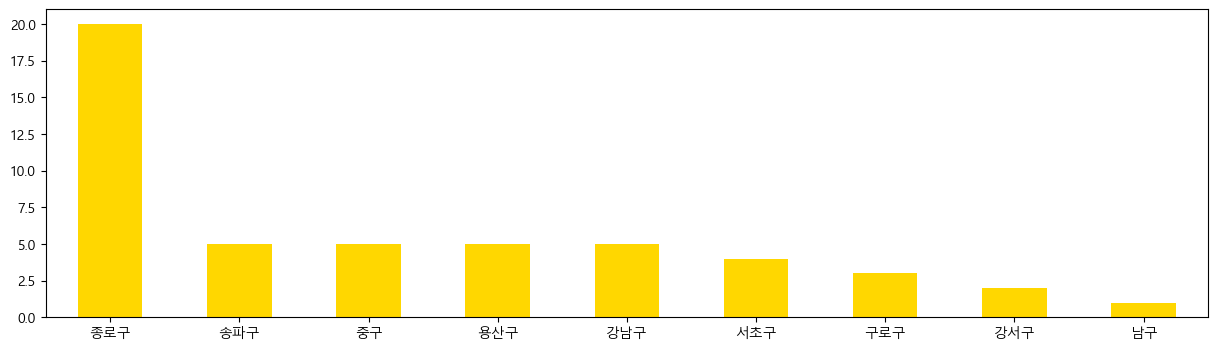

In [66]:
musical_ba=musical_rank['구별'].value_counts()
musical_ba.plot.bar(figsize=(15,4), rot=0, color='gold')

## seaborn을 이용한 상관 분석

In [56]:
#reset함수를 통해서 인덱스 값 다시 설정
musical_rank_index=musical_rank.reset_index()
musical_rank_index.head(3)

,순위,제목,장소,주소,시도,구별
0,1,태양의서커스〈뉴 알레그리아〉,잠실종합운동장 내 빅탑,대한민국 서울특별시 송파구 올림픽로 25,서울특별시,송파구
1,2,뮤지컬 〈킹키부츠〉,충무아트센터 대극장,대한민국 서울특별시 중구 퇴계로 387 6층,서울특별시,중구
2,3,뮤지컬 〈엘리자벳〉 10주년 기념공연,블루스퀘어 신한카드홀,대한민국 서울특별시 용산구 한남동 이태원로 294,서울특별시,용산구


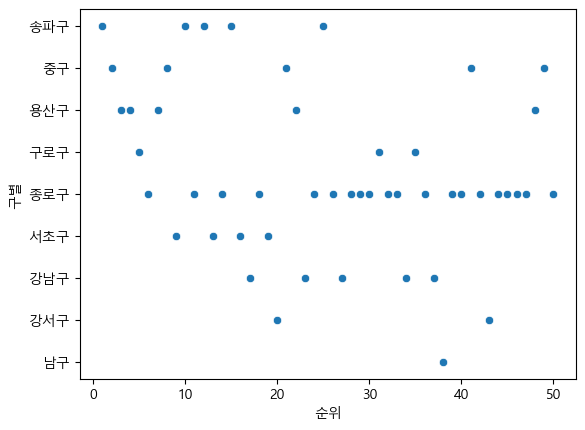

In [83]:
import seaborn as sns
musical_rank_gu = sns.scatterplot(x='순위', y='구별', data=musical_rank_index)

#### 분석 결과

- 공연장이 가장 많은 종로에는 높은 순위의 뮤지컬만 공연하는 것이 아니라 고르게 분포해있다.


- 인기가 높은 뮤지컬일수록 공연장이 많은 장소에서 공연하는 것은 아니다.


- 인기 상위권의 뮤지컬 공연이 많은 구는 평균적으로 송파구이다. #샤롯데시어터


- 뮤지컬의 인기도와 공연장의 밀집도는 상관 관계가 없다.

## 시사점

이 분석을 통해 뮤지컬의 인기도와 공연장의 밀집도는 관계가 없음을 알 수 있다.
- 뮤지컬의 흥행을 위해 무작정 공연장이 많이 있는 곳에서 공연하는 것은 좋은 결과를 낼 수 없을 것이다.

이 분석을 통해 인기 있는 뮤지컬들은 수도권에 공연장이 몰려있음을 알 수 있다.
- 지역 간의 문화 생활 편차를 줄이기 위한 노력이 필요하다.
